In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

# Some exploratory analysis

In [2]:
df = pd.read_csv("Food_Establishment_Inspection_Data.csv" , low_memory=False)

In [3]:
df.head(1)

,Name,Program Identifier,Inspection Date,Description,Address,City,Zip Code,Phone,Longitude,Latitude,...,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade
0,#807 TUTTA BELLA,#807 TUTTA BELLA,08/31/2022,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,10.0,Unsatisfactory,False,BLUE,"3200 - Insects, rodents, animals not present; ...",5,PR0089260,DAEEWQC0L,IVQ7QYW2V,1.0


In [4]:
df_cleaned = df[['Inspection Score' ,'Inspection Result' ,  'Inspection Closed Business' , 'Violation Type','Violation Points',"Grade","Violation Description"]]

In [5]:
df_cleaned

,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Points,Grade,Violation Description
0,10.0,Unsatisfactory,False,BLUE,5,1.0,"3200 - Insects, rodents, animals not present; ..."
1,10.0,Unsatisfactory,False,RED,5,1.0,0200 - Food Worker Cards current for all food ...
2,0.0,Satisfactory,False,NaN,0,1.0,NaN
3,0.0,Satisfactory,False,NaN,0,1.0,NaN
4,0.0,Satisfactory,False,NaN,0,2.0,NaN
...,...,...,...,...,...,...,...
250753,0.0,Complete,False,NaN,0,2.0,NaN
250754,0.0,Satisfactory,False,NaN,0,2.0,NaN
250755,0.0,Satisfactory,False,NaN,0,2.0,NaN
250756,0.0,Complete,False,NaN,0,2.0,NaN


<AxesSubplot: xlabel='Violation Type', ylabel='Violation Points'>

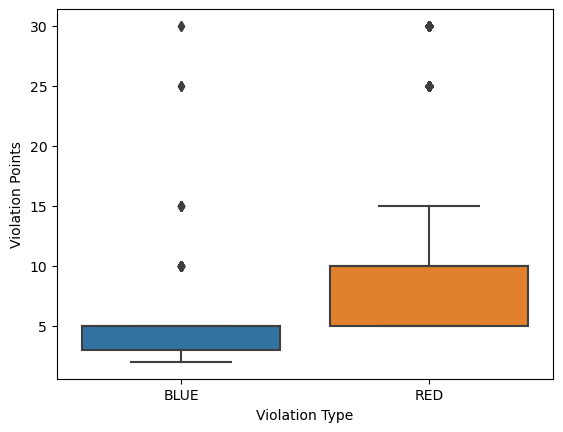

In [6]:
sns.boxplot(data= df_cleaned , x = "Violation Type" , y = "Violation Points")

<AxesSubplot: xlabel='Violation Points', ylabel='Inspection Result'>

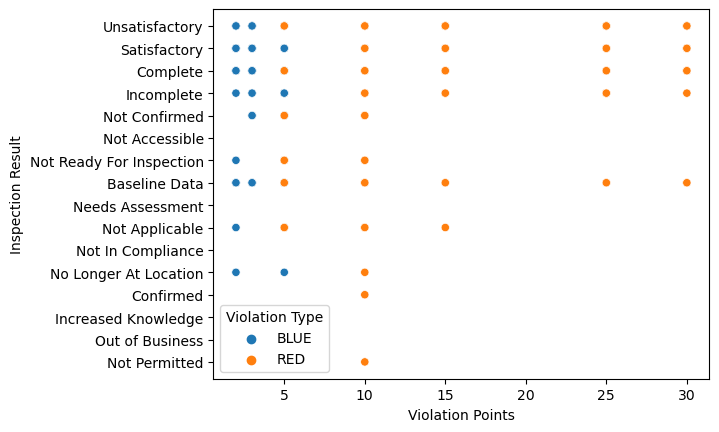

In [7]:
sns.scatterplot(data= df_cleaned , x = "Violation Points" , y = "Inspection Result", hue = "Violation Type")

In [8]:
df_cleaned.corr()

/tmp/ipykernel_5094/1367570080.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned.corr()


,Inspection Score,Violation Points,Grade
Inspection Score,1.000000,0.591614,0.291949
Violation Points,0.591614,1.000000,0.161187
Grade,0.291949,0.161187,1.000000


In [9]:
df_cleaned.describe()

,Inspection Score,Violation Points,Grade
count,249952.000000,250758.000000,191184.000000
mean,14.137182,4.408805,1.381611
std,20.281002,6.159414,0.579045
min,-30.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000
50%,5.000000,3.000000,1.000000
75%,20.000000,5.000000,2.000000
max,178.000000,30.000000,4.000000


In [10]:
df_cleaned["City"].nunique()

KeyError: 'City'

In [ ]:
df_cleaned["City"].unique()

In [ ]:
df_cleaned["City"].value_counts()

In [ ]:
df_cleaned["Grade"].unique()

In [ ]:
df_cleaned["Inspection Result"].unique()

In [ ]:
df_cleaned["Inspection Result"].nunique()

In [ ]:
df_cleaned["Violation Points"].unique()

In [ ]:
df_cleaned["Inspection Score"].unique()

In [ ]:
df_cleaned["Inspection Type"].unique()

In [ ]:
sns.histplot(data= df_cleaned , x = "Grade")

In [ ]:
sns.histplot(data= df_cleaned , x = "Violation Points")

In [ ]:
ax = sns.barplot(data=df_cleaned , x = "Inspection Result" , y= "Inspection Score")
ax.tick_params(axis='x', rotation=90)

In [ ]:
df.columns

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_mapbox(df, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Address",
                        zoom=8, 
                        height=800,
                        width=800)

In [ ]:
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
df.head(3)

In [ ]:
df.loc[0,"Inspection Score"]

In [ ]:
df.columns

In [ ]:
sum(df["Inspection Business Name"].isna())

In [ ]:
sum(df["Inspection Type"].isna())

In [ ]:
sum(df["Inspection Score"].isna())

In [ ]:
sum(df["Inspection Result"].isna())

In [13]:
sum(df["Inspection Closed Business"].isna())

765

In [12]:
sum(df["Violation Type"].isna())

111623

In [14]:
sum(df["Violation Description"].isna())

111623

In [15]:
sum(df["Violation Points"].isna())

0

In [16]:
sum(df["Business_ID"].isna())

0

In [17]:
sum(df["Inspection_Serial_Num"].isna())

765

In [ ]:
sum(df["Violation_Record_ID"].isna())

In [ ]:
sum(df["Grade"].isna())

In [ ]:
sum(df["Violation Points"].isna())

In [ ]:
sum(df["Name"].isna())

In [ ]:
sum(df["Program Identifier"].isna())

In [ ]:
sum(df["Inspection Date"].isna())

In [ ]:
sum(df["Description"].isna())

In [ ]:
sum(df["Address"].isna())

In [ ]:
sum(df["City"].isna())

In [ ]:
sum(df["Zip Code"].isna())

In [ ]:
sum(df["Phone"].isna())

In [ ]:
sum(df["Longitude"].isna())

In [ ]:
sum(df["Latitude"].isna())

In [ ]:
df.shape

In [ ]:
df["City"].nunique()

In [ ]:
df["City"].unique()

In [ ]:
df["Inspection Type"].unique()

In [ ]:
df["Inspection Score"].unique()

In [ ]:
df["Violation Description"].nunique()


In [ ]:
df["Violation Points"].nunique()


In [ ]:
df["Violation Points"].unique()


In [ ]:
df["Business_ID"].unique()


In [ ]:
df["Violation_Record_ID"].unique()


In [ ]:
df["Violation_Record_ID"].nunique()


In [ ]:
sum(df["Violation_Record_ID"].isna())

In [ ]:
df["Inspection_Serial_Num"].nunique()


In [ ]:
sum(df["Inspection_Serial_Num"].isna())


In [ ]:
df["Grade"].unique()

# Data Cleaning

In [ ]:
df = pd.read_csv("Food_Establishment_Inspection_Data.csv" , low_memory=False)

In [ ]:
df.head()

## Dropping rows/columns

In [ ]:
missing_values = {}
for col in df:
    missing_values[col] = sum(df[col].isna())

In [ ]:
# plt.figure(figsize=(5,5))
# plt.bar(missing_values.keys(), missing_values.values())
# plt.xticks(rotation = 90);
# plt.savefig("missing_data.jpg",bbox_inches = "tight")

In [ ]:
df[df["Inspection Date"].isna()]

In [ ]:
df_cleaned = df.drop(df[df["Inspection Date"].isna()].index , axis=0)

In [ ]:
missing_values_cleaned = {}
for col in df_cleaned:
    missing_values_cleaned[col] = sum(df_cleaned[col].isna())

In [ ]:
missing_values_cleaned

In [ ]:
# plt.figure(figsize=(5,5))
# plt.bar(missing_values_cleaned.keys(), missing_values_cleaned.values())
# plt.xticks(rotation = 90);
# plt.savefig("missing_data_cleaned.jpg",bbox_inches = "tight")

In [ ]:
df_cleaned.drop(["Phone" , "Violation_Record_ID"],axis=1,inplace=True)

## Filling missing data

### Fill Inspection Score missing values

In [ ]:
df_cleaned[df_cleaned["Inspection Score"].isna()].head()

In [ ]:
look_up = df_cleaned.pivot_table(index="Inspection Closed Business" , columns="Inspection Result", values ="Inspection Score" ,aggfunc="mean" )

In [ ]:
look_up

In [ ]:
look_up.loc[True,"Complete"]

In [ ]:
df_cleaned.loc[df_cleaned[df_cleaned["Inspection Score"].isna()].index,"Inspection Score"] = df_cleaned[df_cleaned["Inspection Score"].isna()].apply(lambda x :look_up.loc[x["Inspection Closed Business"],x["Inspection Result"]] , axis = 1)

In [ ]:
df_cleaned["Inspection Score"].isna()

### Fill Violation Type missing values

In [ ]:
df_cleaned.head()

In [ ]:
df_cleaned.pivot_table(index=["Inspection Result","Inspection Closed Business"] , columns="Violation Type", aggfunc="size")
# No meaningful result

In [ ]:
df_cleaned.pivot_table(index=["Inspection Result","Inspection Closed Business"] , columns="Violation Type",values = "Inspection Score" ,aggfunc="mean")
# No meaningful result

In [ ]:
df_cleaned.pivot_table(index=["Inspection Result","Inspection Closed Business"] , columns="Violation Type",values = "Violation Points" ,aggfunc="mean")


In [ ]:
sns.boxplot(data=df_cleaned, x = "Violation Type" , y = "Violation Points")

In [ ]:
## ^^^^ seems like 3rd quantile of violation points in blue group is 5
##  also 1st quantile of violation points in red group is 5
## so violation points beneath 5 are most likely Blue otherwise they are Red

In [ ]:
np.percentile(df_cleaned[df_cleaned["Violation Type"] == "BLUE"]["Violation Points"],75)

In [ ]:
np.percentile(df_cleaned[df_cleaned["Violation Type"] == "RED"]["Violation Points"],25)

In [ ]:
df_cleaned.loc[df_cleaned[df_cleaned["Violation Type"].isna()].index,"Violation Type"] = df_cleaned[df_cleaned["Violation Type"].isna()]["Violation Points"].apply(lambda x : "RED" if x > 5 else "BLUE")

In [ ]:
df_cleaned["Violation Type"] = df_cleaned["Violation Type"].map({"Blue" : "BLUE" , "RED" : "RED" , "BLUE" : "BLUE"})

### Check again for missing values

In [ ]:
df_cleaned

In [ ]:
missing_values_cleaned = {}
for col in df_cleaned:
    missing_values_cleaned[col] = sum(df_cleaned[col].isna())

In [ ]:
missing_values_cleaned

In [ ]:
# plt.figure(figsize=(5,5))
# plt.bar(missing_values_cleaned.keys(), missing_values_cleaned.values())
# plt.xticks(rotation = 90);
# plt.savefig("missing_data_cleaned_2.jpg",bbox_inches = "tight")

### Filling Grades missing values

In [ ]:
# sns.scatterplot(data= df_cleaned ,  x = "Longitude" , y = "Latitude" , hue = "Grade")

In [ ]:
df_cleaned.corr()

In [ ]:
# sns.boxplot(data=df_cleaned , y = "Inspection Score",hue =df_cleaned[['Violation Type', 'Grade']].apply(tuple, axis=1),x = "Inspection Closed Business")

In [ ]:
sns.boxplot(data=df_cleaned,x = "Grade" , y = "Longitude")

In [ ]:
sns.boxplot(data=df_cleaned,x = "Grade" , y = "Latitude")

In [ ]:
sns.boxplot(data=df_cleaned,x = "Grade" , y = "Inspection Score")

In [ ]:
sns.boxplot(data=df_cleaned,x = "Grade" , y = "Violation Points")

In [ ]:
fig , ax = plt.subplots(1,1)
ax = sns.scatterplot(data= df_cleaned , x = "Violation Points" , y = "Inspection Score",  hue = "Grade",style= "Violation Type")
ax.legend(loc = (1,1));

In [ ]:
fig , ax = plt.subplots(1,1)
ax = sns.scatterplot(data= df_cleaned , y = "Inspection Score",  x = "Grade",hue= "Violation Type",alpha=0.5)
ax.legend(loc = (1,1));

In [ ]:
fig , ax = plt.subplots(1,1,figsize = (20,20))
ax = sns.scatterplot(data= df_cleaned , y = "Latitude",  x = "Longitude",hue= "Grade",alpha=0.5,legend=False)
# ax.legend.remove()


### Filling Description missing values

In [ ]:
df_cleaned[df_cleaned["Description"].str.endswith("plumbing")]

In [ ]:
df_cleaned["Category"] = df_cleaned.loc[:, "Description"].apply(lambda x: {"I":1 , "II":2 ,"III":3 , "plumbing":0}[x.split("-")[-1].split(" ")[-1]])

In [ ]:
df_cleaned

In [ ]:
cross_tab = pd.crosstab(index= df_cleaned.Grade , columns=df_cleaned.Category,normalize=False)

In [ ]:
cross_tab

In [ ]:
_ , p_value , dof , expeted_values = chi2_contingency(cross_tab)

In [ ]:
p_value

In [ ]:
expeted_values

In [ ]:
sns.boxplot(data=df_cleaned , x = "Category" , y = "Inspection Score" , hue= "Grade")

In [ ]:
sns.heatmap(pd.crosstab(index= [df_cleaned.Category , df_cleaned["Violation Type"]] ,columns=df_cleaned.Grade ,normalize=False))

In [ ]:
### fill values with grade 1

In [ ]:
df_cleaned["Grade"].fillna()

In [ ]:
q1 = np.quantile(df_cleaned["Inspection Score"],0.25)
q2 = np.quantile(df_cleaned["Inspection Score"],0.5)
q3 = np.quantile(df_cleaned["Inspection Score"],0.75)
def Inspection_Score_InRange_Categorizer( x) :
    if x <q1:
        return 0
    elif x <q2:
        return 1
    elif x <q3 :
        return 2
    else: return 3

In [ ]:
Inspection_Score_InRange_Categorizer( 233)

In [ ]:
df_cleaned["Inspection_Score_InRange"] = df_cleaned["Inspection Score"].apply(lambda x:Inspection_Score_InRange_Categorizer(x))

In [ ]:
d = pd.crosstab(index=[df_cleaned["Inspection Closed Business"],df_cleaned["Inspection_Score_InRange"] , df_cleaned["Violation Type"]],columns=df_cleaned.Grade)

In [ ]:
d

In [ ]:
df_cleaned["Grade"].fillna(1,inplace=True)

In [ ]:
df_cleaned = df_cleaned.drop([ "Business_ID" , "Inspection_Serial_Num" ,"Inspection_Score_InRange", "Address" ,"Zip Code", "Inspection Business Name" ,"Program Identifier"],axis=1)

In [ ]:
df_cleaned.to_csv("cleaned_dataset_V1.csv", header=True , index=False)

In [23]:
df_cleaned_Violation_Description=df_cleaned.dropna()

In [24]:
df_cleaned_Violation_Description.to_csv("cleaned_dataset_V1_Violation_Description.csv", header=True , index=False)

In [26]:
df_cleaned_Violation_Description.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116325 entries, 0 to 250757
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Inspection Score            116325 non-null  float64
 1   Inspection Result           116325 non-null  object 
 2   Inspection Closed Business  116325 non-null  object 
 3   Violation Type              116325 non-null  object 
 4   Violation Points            116325 non-null  int64  
 5   Grade                       116325 non-null  float64
 6   Violation Description       116325 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 7.1+ MB
